# Shanmuga Priyan Jeevanandam
# C0889053

https://github.com/shanmugapriyan357/Campus_Placement

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Selection

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Term 3 NLP/NN DL/ml-with-python-course-project/train.csv')


# Data Preprocessing

In [12]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in the 'salary' column with the median
df['salary'] = df['salary'].fillna(df['salary'].median())


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Check the dataset after encoding
print(df.head())


   sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1       0  67.00      1  91.00      1      1     58.00         2   
1      2       0  79.33      0  78.33      1      2     77.48         2   
2      3       0  65.00      0  68.00      0      0     64.00         0   
3      4       0  56.00      0  52.00      0      2     52.00         2   
4      5       0  85.80      0  73.60      0      1     73.30         0   

   workex  etest_p  specialisation  mba_p  status    salary  
0       0     55.0               1  58.80       1  270000.0  
1       1     86.5               0  66.28       1  200000.0  
2       0     75.0               0  57.80       1  250000.0  
3       0     66.0               1  59.43       0  265000.0  
4       0     96.8               0  55.50       1  425000.0  


In [14]:
# Splitting the data into features and target variable
X = df.drop(columns=['sl_no', 'status', 'salary'])
y = df['status']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model Selection and Model Training

In [16]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
svc_model = SVC(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)

# Perform hyperparameter tuning
rf_grid = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1')
lr_grid = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='f1')
svc_grid = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='f1')
dt_grid = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='f1')
gb_grid = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='f1')
ab_grid = GridSearchCV(ab_model, param_grid_ab, cv=5, scoring='f1')

# Fit the models
rf_grid.fit(X_train, y_train)
lr_grid.fit(X_train, y_train)
svc_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
ab_grid.fit(X_train, y_train)

# Best estimators
rf_best = rf_grid.best_estimator_
lr_best = lr_grid.best_estimator_
svc_best = svc_grid.best_estimator_
dt_best = dt_grid.best_estimator_
gb_best = gb_grid.best_estimator_
ab_best = ab_grid.best_estimator_


# Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


Random Forest: Accuracy=0.8, Precision=0.7924528301886793, Recall=0.9545454545454546, F1-score=0.865979381443299
Confusion Matrix:
[[10 11]
 [ 2 42]]
Logistic Regression: Accuracy=0.8307692307692308, Precision=0.851063829787234, Recall=0.9090909090909091, F1-score=0.8791208791208791
Confusion Matrix:
[[14  7]
 [ 4 40]]
SVC: Accuracy=0.8307692307692308, Precision=0.851063829787234, Recall=0.9090909090909091, F1-score=0.8791208791208791
Confusion Matrix:
[[14  7]
 [ 4 40]]
Decision Tree: Accuracy=0.7538461538461538, Precision=0.7692307692307693, Recall=0.9090909090909091, F1-score=0.8333333333333333
Confusion Matrix:
[[ 9 12]
 [ 4 40]]
Gradient Boosting: Accuracy=0.7846153846153846, Precision=0.7884615384615384, Recall=0.9318181818181818, F1-score=0.8541666666666667
Confusion Matrix:
[[10 11]
 [ 3 41]]
AdaBoost: Accuracy=0.8153846153846154, Precision=0.82, Recall=0.9318181818181818, F1-score=0.8723404255319149
Confusion Matrix:
[[12  9]
 [ 3 41]]


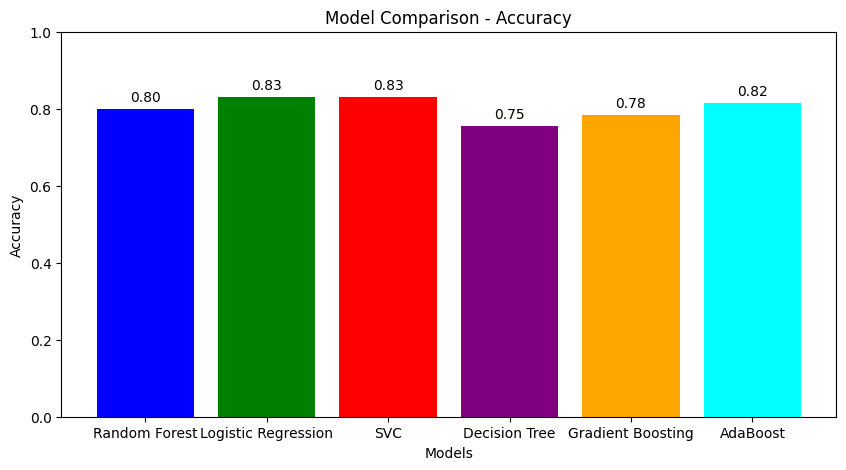

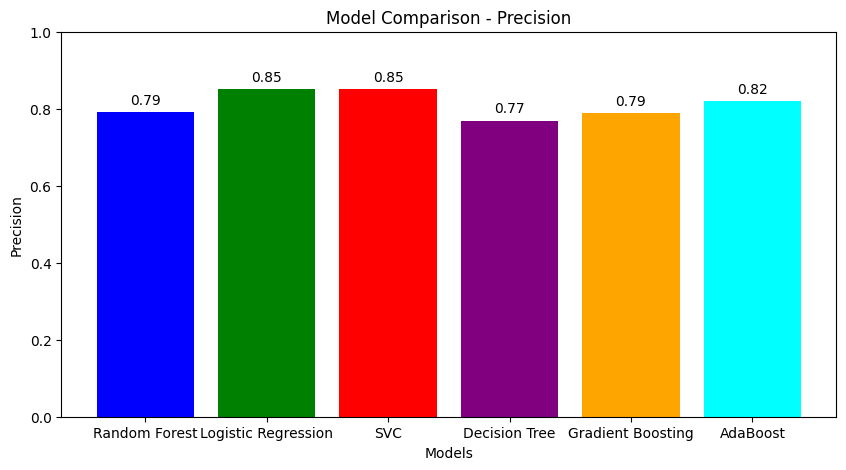

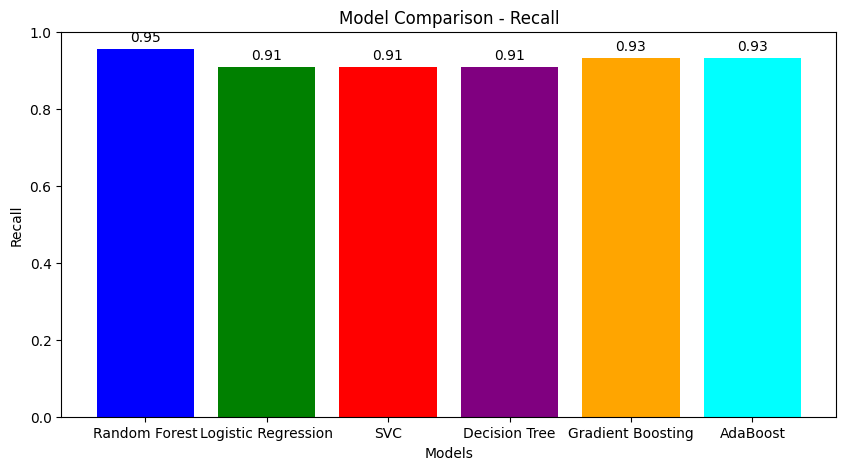

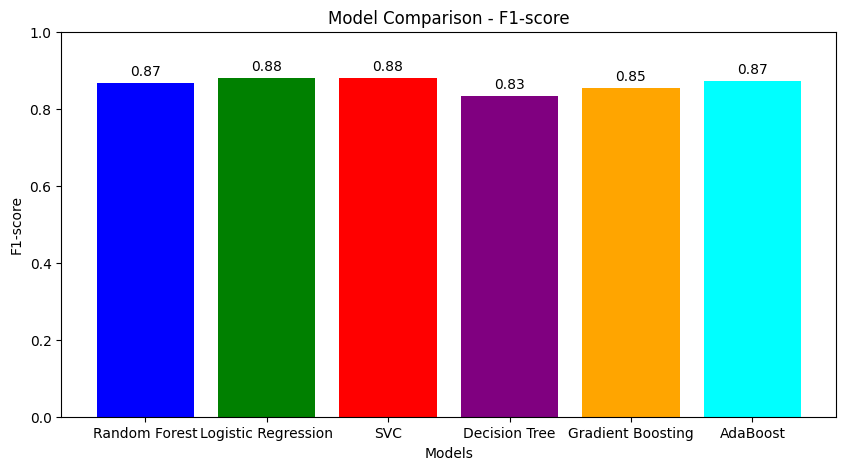

In [19]:
# Define a function to evaluate models
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    return accuracy, precision, recall, f1, cm

# Evaluate each model
models = {
    'Random Forest': rf_best,
    'Logistic Regression': lr_best,
    'SVC': svc_best,
    'Decision Tree': dt_best,
    'Gradient Boosting': gb_best,
    'AdaBoost': ab_best
}

results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_val, y_val)
    results[model_name] = (accuracy, precision, recall, f1, cm)
    print(f"{model_name}: Accuracy={accuracy}, Precision={precision}, Recall={recall}, F1-score={f1}")
    print(f"Confusion Matrix:\n{cm}")

# Visualize the results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for metric in metrics:
    metric_values = [results[model_name][metrics.index(metric)] for model_name in models]
    plt.figure(figsize=(10, 5))
    plt.bar(models.keys(), metric_values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
    plt.title(f'Model Comparison - {metric}')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    for i, v in enumerate(metric_values):
        plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
    plt.show()


# Voting Classifier

Voting Classifier: Accuracy=0.8, Precision=0.8163265306122449, Recall=0.9090909090909091, F1-score=0.8602150537634408
Confusion Matrix:
[[12  9]
 [ 4 40]]


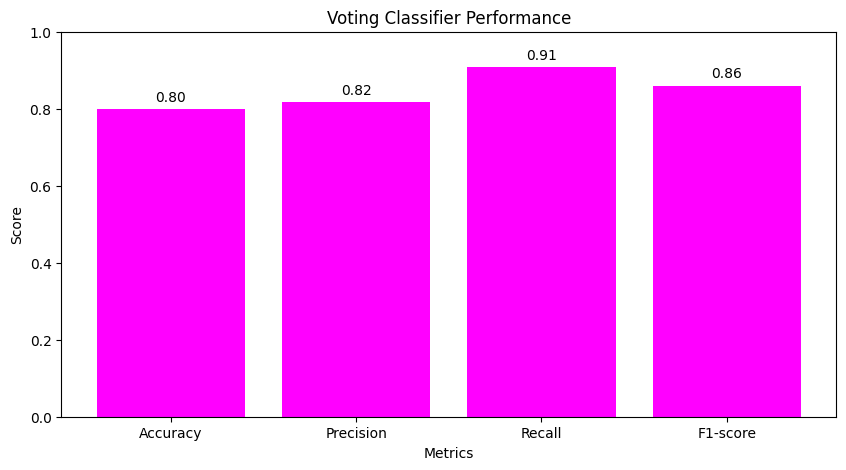

In [10]:
# Ensemble model
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('lr', lr_best),
    ('svc', svc_best),
    ('dt', dt_best),
    ('gb', gb_best),
    ('ab', ab_best)
], voting='hard')

voting_clf.fit(X_train, y_train)
voting_accuracy, voting_precision, voting_recall, voting_f1, voting_cm = evaluate_model(voting_clf, X_val, y_val)
print(f"Voting Classifier: Accuracy={voting_accuracy}, Precision={voting_precision}, Recall={voting_recall}, F1-score={voting_f1}")
print(f"Confusion Matrix:\n{voting_cm}")

# Visualize the performance of the Voting Classifier
voting_metrics = [voting_accuracy, voting_precision, voting_recall, voting_f1]
plt.figure(figsize=(10, 5))
plt.bar(metrics, voting_metrics, color='magenta')
plt.title('Voting Classifier Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
for i, v in enumerate(voting_metrics):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')
plt.show()
